In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# Basic Data Cleaning Example

# Load data
df = pd.read_csv('/kaggle/input/cafe-sales-dirty-data-for-cleaning-training/dirty_cafe_sales.csv')

# 1. Check initial data
print("Original shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Original shape: (10000, 8)

First 5 rows:
  Transaction ID    Item Quantity Price Per Unit Total Spent  Payment Method  \
0    TXN_1961373  Coffee        2            2.0         4.0     Credit Card   
1    TXN_4977031    Cake        4            3.0        12.0            Cash   
2    TXN_4271903  Cookie        4            1.0       ERROR     Credit Card   
3    TXN_7034554   Salad        2            5.0        10.0         UNKNOWN   
4    TXN_3160411  Coffee        2            2.0         4.0  Digital Wallet   

   Location Transaction Date  
0  Takeaway       2023-09-08  
1  In-store       2023-05-16  
2  In-store       2023-07-19  
3   UNKNOWN       2023-04-27  
4  In-store       2023-06-11  


In [21]:
# 2. Clean columns
# Transaction ID - remove duplicates
df = df.drop_duplicates(subset=['Transaction ID'])

# Item - standardize names
df['Item'] = df['Item'].str.strip().str.title()
df['Item'] = df['Item'].replace({'Cappucino': 'Cappuccino', 'Latte ': 'Latte'})

# Quantity - convert to positive integers
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df = df[df['Quantity'] > 0]

# Price Per Unit - clean numeric values
df['Price Per Unit'] = (
    df['Price Per Unit']
    .replace({'ERROR': '', '[^\d.]': ''}, regex=True)  # Remove non-numeric chars
    .pipe(pd.to_numeric, errors='coerce')
)

# Remove rows where price conversion failed
df = df.dropna(subset=['Price Per Unit'])

# Now this will work:
df['Total Spent'] = df['Quantity'] * df['Price Per Unit']

# Payment Method - standardize
df['Payment Method'] = df['Payment Method'].str.title().str.strip()
df['Payment Method'] = df['Payment Method'].replace({'Cc': 'Credit Card'})

# Transaction Date - convert to datetime
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

# 3. Handle missing data
df = df.dropna(subset=['Transaction Date', 'Price Per Unit'])

# 4. Recalculate Total Spent
df['Total Spent'] = df['Quantity'] * df['Price Per Unit']

# 5. Final check
print("\nCleaned data shape:", df.shape)
print("\nCleaned data sample:")
print(df.sample(5))

# Save cleaned data
df.to_csv('/kaggle/working/cleaned_cafe_sales.csv', index=False) mm


Cleaned data shape: (8596, 8)

Cleaned data sample:
     Transaction ID    Item  Quantity  Price Per Unit  Total Spent  \
276     TXN_2078474  Cookie       2.0             1.0          2.0   
5405    TXN_8811902     Tea       5.0             1.5          7.5   
8115    TXN_4108567  Coffee       2.0             2.0          4.0   
5021    TXN_7423885   Juice       4.0             3.0         12.0   
572     TXN_4669664  Cookie       1.0             1.0          1.0   

      Payment Method  Location Transaction Date  
276              NaN  Takeaway       2023-11-03  
5405     Credit Card       NaN       2023-08-07  
8115            Cash  Takeaway       2023-08-14  
5021  Digital Wallet  Takeaway       2023-09-06  
572   Digital Wallet  In-store       2023-12-21  


In [53]:
# After cleaning data, before plotting:
import numpy as np

# 1. Handle infinite values
numeric_cols = ['Total Spent', 'Quantity', 'Price Per Unit']
df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], np.nan)

# 2. Remove infinite value rows (optional)
df = df.dropna(subset=numeric_cols, how='any')

# 3. Now create your plots
plt.figure(figsize=(12, 6))
# ... rest of your plotting code ...

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [64]:
# Importar librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Load data
df = pd.read_csv('/kaggle/working/cleaned_cafe_sales.csv')

Text(0, 0.5, 'Product')

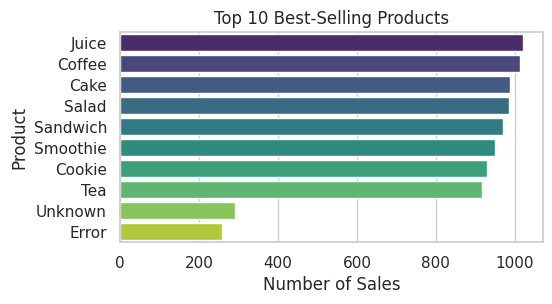

In [65]:
# Configure the style of the plots
sns.set(style="whitegrid")  # Sets the plot background to white grid
plt.figure(figsize=(12, 6))  # Sets the overall figure size to 12x6 inches

# 1. Sales by Product (Top 10)
plt.subplot(2, 2, 1)  # Creates a subplot layout (2x2 grid, position 1)
top_items = df['Item'].value_counts().head(10)  # Gets the top 10 most sold products
sns.barplot(x=top_items.values, y=top_items.index, palette="viridis")  # Creates a bar plot
plt.title('Top 10 Best-Selling Products')  # Sets plot title
plt.xlabel('Number of Sales')  # Label for the x-axis
plt.ylabel('Product')  # Label for the y-axis


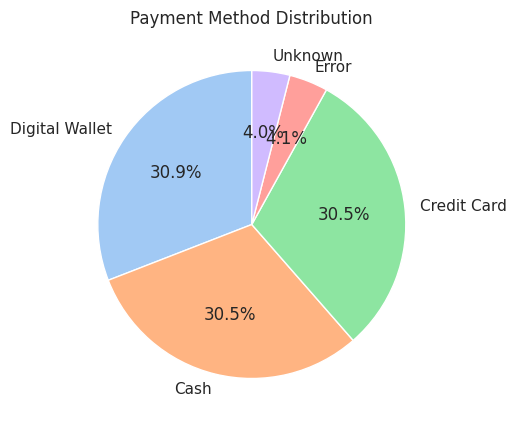

In [66]:
2 # Payment Method Distribution  
plt.figure(figsize=(5, 5))  # Set figure size  
payment_counts = df['Payment Method'].value_counts()  # Count payment method occurrences  
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', 
        colors=sns.color_palette("pastel"), startangle=90)  # Pie chart with percentage labels  
plt.title('Payment Method Distribution')  # Plot title  
plt.show()  # Display the plot 

Text(0, 0.5, 'Location')

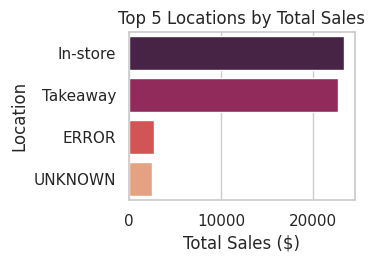

In [67]:
# 3. Sales by Location  
plt.subplot(2, 2, 4)  # Adds the third plot in the grid  
location_sales = df.groupby('Location')['Total Spent'].sum().sort_values(ascending=False).head(5)  
sns.barplot(x=location_sales.values, y=location_sales.index, palette="rocket")  # Creates a bar plot  
plt.title('Top 5 Locations by Total Sales')  
plt.xlabel('Total Sales ($)')  
plt.ylabel('Location')  

In [68]:
# Adjust layout and display  
plt.tight_layout()  # Prevents overlap between plots  
plt.savefig('/kaggle/working/ventas_cafe.png', dpi=300)  # Saves the plot as a high-quality image  
plt.show()  # Displays the plots 

<Figure size 640x480 with 0 Axes>

Found 0 rows with invalid dates:
Empty DataFrame
Columns: [Transaction ID, Item, Quantity, Price Per Unit, Total Spent, Payment Method, Location, Transaction Date]
Index: []


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([19358., 19417., 19478., 19539., 19601., 19662., 19723.]),
 [Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07'),
  Text(19601.0, 0, '2023-09'),
  Text(19662.0, 0, '2023-11'),
  Text(19723.0, 0, '2024-01')])

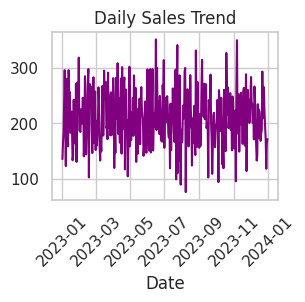

In [69]:
# Fix Transaction Date conversion
df['Transaction Date'] = pd.to_datetime(
    df['Transaction Date'],
    format='%Y-%m-%d',  # Adjust format as needed
    errors='coerce'  # Convert invalid dates to NaT
)

# Handle invalid dates
invalid_dates = df[df['Transaction Date'].isna()]
print(f"Found {len(invalid_dates)} rows with invalid dates:")
print(invalid_dates)

# Remove rows with invalid dates
df = df.dropna(subset=['Transaction Date'])

# Now this will work
plt.subplot(2, 2, 4)
df['Date'] = df['Transaction Date'].dt.date
daily_sales = df.groupby('Date')['Total Spent'].sum()
sns.lineplot(x=daily_sales.index, y=daily_sales.values, color="purple")
plt.title('Daily Sales Trend')
plt.xticks(rotation=45)